In [1]:
# Selenium 설치.
# !pip install selenium

In [2]:
import numpy as np
import re
import time
import matplotlib.pyplot as plt

import urllib.request
import requests as rq
import bs4

import konlpy
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [3]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

def cleaning(argStr):
    argStr = argStr.lower()
    argStr = re.sub(r'[^가-힣0-9a-z.?!]',  ' ',argStr)
    argStr = re.sub("^.*back", "", argStr)
    argStr = re.sub(r'\s+', ' ',argStr)
    argStr = re.sub(r'\s$', '' ,argStr)
    return(argStr)

def getLstUrlNews(argLstHl):
    lstHyperLinkNews = []
    for hl in argLstHl:
        hlSubj = hl.find('strong')
        if hlSubj:
            strSubj = hlSubj.text
            if (len(strSubj) > 10):
                lstHyperLinkNews.append(hl)
                
    lstLinkNews = [x.get("href") for x in lstHyperLinkNews]
    return(lstLinkNews)

def modiUrl(argUrl):    
    if "https://news.naver.com" not in argUrl:
        argUrl = "https://news.naver.com" + argUrl
        
    return(argUrl)

def getOneTextNews(argUrl):
    url = modiUrl(argUrl)
    res = rq.get(url, headers=headers)
    time.sleep(0.1)
    
    soup = bs4.BeautifulSoup(res.text, 'html.parser')
    tagCont = soup.find("div", id="articleBodyContents")
    return(cleaning(tagCont.text))

In [4]:
naverNewsUrl = "https://news.naver.com"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

def getLstTextNews(argUrl, argNum=1):
    lstNewsText =[]
    
    res = rq.get(argUrl, headers=headers)
    time.sleep(0.1)
    
    soup01 = bs4.BeautifulSoup(res.text, 'html.parser')
    lstHyperLinkElm = soup01.find_all('a', class_=re.compile('clicks'))    
    lstUrl = getLstUrlNews(lstHyperLinkElm)
    
    if  argNum==1:
        urlTarget = lstUrl[np.random.randint(0, len(lstUrl))]
        lstNewsText.append(getOneTextNews(urlTarget))
    else:
        for ith in range(argNum):
            lstNewsText.append(getOneTextNews(lstUrl[ith]))
        
    return lstNewsText
    
lstTextNews= getLstTextNews(naverNewsUrl, 1)
print(f"{len(lstTextNews)}\n{lstTextNews}")

1
[' 동대문 더 아모르 오피스텔이 분양을 시작했다. 140호실로 지하1층 지상14층 규모로 설계됐으며 동시 주차대수는 약 70대다.주변 교통망의 경우 내부순환로 강변북로 동부간선도로와 인접한 서울 전역으로의 이동이 용이하고 5호선 장한평역과 7호선 용마산역과 근접해 있다. 특히 2개 이상의 노선을 모두 이용할 수 있는 멀티 역세권으로써 출퇴근 소요시간이 단축될 수 있다.뿐만 아니라 차량을 이용해 직장이 밀집해 있는 종로나 강남으로 출퇴근 할 경우 10분대로 진입이 가능하다.이밖에도 설계적인 면에서의 장점으로는 내진설계 강진에도 견딜 수 있는 우수한 내진 7등급설계 저녹스 보일러 각 세대별 설치로 개별난방과 연료절감 2중 중문 거실과 방이 2열 미닫이 중문으로 탁 트인 개방감과 용이한 공간활용 등이 있다.아울러 시스템적인 장점으로는 1등급 창문 기밀성능 외부에서 내부를 보호하는 로이창문과 이중창으로 집안 온도 유지 용이 과 커뮤니티 시설과 범죄예방 설계 입주민 커뮤니케이션 등 시설과 설계부터 적용된 시스템 에너지 절감형 환기장치 전열교환기로 미세먼지 등 유해물질 제거 및 공기정화 시스템 풀옵션 고급 가전 세탁기 빌트인 냉장고 시스템에어컨 전열교환기 등 이 있다.분양 관계자는 더 아모르는 편리한 생활환경 풍부한 생활 인프라 직장인과 대학가 복합 탄탄한 임대수요 도심 속 힐링이 가능한 그린 라이프 이 오피스텔만의 매력적인 특화설계 등의 장점이 있다 고 말했다.디지털전략부 네이버에서 경제 증권 전문방송의 한국경제tv를 구독하세요 대한민국 no.1 재테크 증권정보 주식상담 부동산 live 보기 한국경제tv 무단 전재 및 재배포 금지']


In [5]:
kkma = konlpy.tag.Kkma()
lstSent = kkma.sentences(lstTextNews[0])
print(f"{len(lstSent)}\n{lstSent}")

9
['동대문 더 아모르 오피스텔이 분양을 시작했다.', '140 호실로 지하 1 층 지상 14 층 규모로 설계됐으며 동시 주차 대수는 약 70대다.', '주변 교통망의 경우 내부 순환로 강변 북로 동부 간선도로와 인접한 서울 전역으로의 이동이 용이하고 5호 선 장한 평 역과 7호 선 용마 산역과 근접해 있다.', '특히 2개 이상의 노선을 모두 이용할 수 있는 멀티 역세권으로써 출퇴근 소요시간이 단축될 수 있다.', '뿐만 아니라 차량을 이용해 직장이 밀집해 있는 종로 나 강남으로 출퇴근 할 경우 10 분대로 진입이 가능하다.이', '밖에도 설계적인 면에서의 장점으로는 내진설계 강진에도 견딜 수 있는 우수한 내진 7 등급설계 저녹스 보일러 각 세대별 설치로 개별 난방과 연료 절감 2 중 중문 거실과 방이 2 열 미닫이 중문으로 탁 트인 개방 감과 용이한 공간 활용 등이 있다.', '아울러 시스템적인 장점으로는 1 등급 창문 기밀 성능 외부에서 내부를 보호하는 로이 창문과 이중창으로 집안 온도 유지 용이 과 커뮤니티 시설과 범죄 예방 설계 입주민 커뮤니케이션 등 시설과 설계부터 적용된 시스템 에너지 절감형 환기장치 전열 교환기로 미세 먼지 등 유해물질 제거 및 공기 정화 시스템 풀 옵션 고급 가전 세탁기 빌트인 냉장고 시스템 에어컨 전열 교환기 등 이 있다.', '분양 관계자는 더 아모르는 편리한 생활환경 풍부한 생활 인프라 직장인과 대학가 복합 탄탄한 임대수요 도심 속 힐 링이 가능한 그린 라이프 이 오피스텔만의 매력적인 특화설계 등의 장점이 있다 고 말했다.', '디지털전략 부 네이버에서 경제 증권 전문방송의 한국경제 tv를 구독 하세요 대한민국 no.1 재 테크 증권정보 주식상담 부동산 live 보기 한국경제 tv 무단 전재 및 재배포 금지']


In [6]:
lstPosSent = []
for x in lstSent:
    lstPosSent.append(kkma.pos(x))

print(f"{len(lstPosSent)}\n{lstPosSent}")

9
[[('동대문', 'NNG'), ('더', 'MAG'), ('아모르', 'NNG'), ('오피스텔', 'NNG'), ('이', 'JKS'), ('분양', 'NNG'), ('을', 'JKO'), ('시작하', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')], [('140', 'NR'), ('호실', 'NNG'), ('로', 'JKM'), ('지하', 'NNG'), ('1', 'NR'), ('층', 'NNG'), ('지상', 'NNG'), ('14', 'NR'), ('층', 'NNG'), ('규모', 'NNG'), ('로', 'JKM'), ('설계', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('으며', 'ECE'), ('동시', 'NNG'), ('주차', 'NNG'), ('대수', 'NNG'), ('는', 'JX'), ('약', 'MDN'), ('70', 'NR'), ('대', 'NNM'), ('이', 'VCP'), ('다', 'EFN'), ('.', 'SF')], [('주변', 'NNG'), ('교통망', 'NNG'), ('의', 'JKG'), ('경우', 'NNG'), ('내부', 'NNG'), ('순환', 'NNG'), ('로', 'XSN'), ('강변', 'NNG'), ('북로', 'NNG'), ('동부', 'NNG'), ('간선', 'NNG'), ('도로', 'NNG'), ('와', 'JKM'), ('인접', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('서울', 'NNG'), ('전역', 'NNG'), ('으로', 'JKM'), ('의', 'JKG'), ('이동', 'NNG'), ('이', 'JKS'), ('용이', 'XR'), ('하', 'XSA'), ('고', 'ECE'), ('5', 'NR'), ('호', 'NNM'), ('선', 'NNG'), ('장', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('평', 'NNG'), ('역과', 'NN

In [7]:
lstPosStop = []
def makeLstNormSent(argLstPosSent,argLstPosStop, argPos=False, argMinLen=0, argOne=True):
    
    lstStrSent = []
    
    for oneSent in argLstPosSent:
        strOneSent = ""
        for word, pos in oneSent:
            lstIsStop = [x in pos for x in argLstPosStop]
            if not any(lstIsStop) and len(word) >= argMinLen:
                if argPos==True:
                    strOneSent += (" "+ word +"-"+pos)
                else:
                    strOneSent += (" "+ word)
        lstStrSent.append(strOneSent)
        
    if argOne==True:
        lstStrSent = [" ".join(lstStrSent)]
    return(lstStrSent)

lstNormSent = makeLstNormSent(lstPosSent, lstPosStop, argPos=False, argMinLen=0, argOne=False)

print(f"{len(lstNormSent)}\n{lstNormSent}")

9
[' 동대문 더 아모르 오피스텔 이 분양 을 시작하 었 다 .', ' 140 호실 로 지하 1 층 지상 14 층 규모 로 설계 되 었 으며 동시 주차 대수 는 약 70 대 이 다 .', ' 주변 교통망 의 경우 내부 순환 로 강변 북로 동부 간선 도로 와 인접 하 ㄴ 서울 전역 으로 의 이동 이 용이 하 고 5 호 선 장 하 ㄴ 평 역과 7 호 선 용마 산역 과 근접 하 어 있 다 .', ' 특히 2 개 이상 의 노선 을 모두 이용 하 ㄹ 수 있 는 멀티 역세권 으로써 출퇴근 소요 시간 이 단축 되 ㄹ 수 있 다 .', ' 뿐 만 아니 라 차량 을 이용 하 어 직장 이 밀집 하 어 있 는 종로 나 아 강남 으로 출퇴근 하 ㄹ 경우 10 분대 로 진입 이 가능 하 다 . 이', ' 밖 에 도 설계 적 이 ㄴ 면 에서 의 장점 으로 는 내진 설계 강진 에 도 견디 ㄹ 수 있 는 우수 하 ㄴ 내진 7 등급 설계 저녹스 보일러 각 세대 별 설치 로 개별 난방 과 연료 절감 2 중 중문 거실 과 방 이 2 열 ㄹ 미닫이 중문 으로 탁 트이 ㄴ 개방 감과 용이 하 ㄴ 공간 활용 등 이 있 다 .', ' 아우르 어 시스템 적 이 ㄴ 장점 으로 는 1 등급 창문 기밀 성능 외부 에서 내부 를 보호 하 는 로이 창문 과 이중창 으로 집안 온도 유지 용 이 과 커뮤니티 시설 과 범죄 예방 설계 입주민 커뮤니케이션 등 시설 과 설계 부터 적용 되 ㄴ 시스템 에너지 절감 형 환기 장치 전열 교환기 로 미세 먼지 등 유해 물질 제거 및 공기 정화 시스템 푸 ㄹ 옵션 고급 가전 세탁기 빌트인 냉장고 시스템 에어컨 전열 교환기 등 이 있 다 .', ' 분양 관계자 는 더 아모르 는 편리 하 ㄴ 생활환경 풍부 하 ㄴ 생활 인프라 직장인 과 대학가 복합 탄탄 하 ㄴ 임대 수요 도심 속 힐 링 이 가능 하 ㄴ 그린 라이프 이 오피스텔 만 의 매력적 이 ㄴ 특화 설계 등 의 장점 이 있 다 이 고 말하 었 다 .', ' 디지털 전략 부 네이버 에서 경제 증권 전문 방송 의 한국 경제 tv 

In [8]:
def makeNGram(argLstSent, argNum=3):
    vectMy = CountVectorizer(ngram_range=(argNum, argNum), analyzer="word")
    lstNGram = vectMy.fit(argLstSent).get_feature_names()
    # ar2NGramCnt = vectMy.transform(argLstSent).toarray()        # 결과는 array of array.
    # lstNGramCnt = list(ar2NGramCnt[0])                          # 단순한 리스트로 변환.
    return(lstNGram)

lstNGram = makeNGram(lstNormSent)
print(f"{len(lstNGram)}\n{lstNGram}")

184
['10 분대 진입', '14 규모 설계', '140 호실 지하', 'live 보기 한국', 'no 테크 증권', 'tv 구독 하세', 'tv 무단 전재', '가능 그린 라이프', '가전 세탁기 빌트인', '간선 도로 인접', '감과 용이 공간', '강남 으로 출퇴근', '강변 북로 동부', '강진 견디 우수', '개방 감과 용이', '개별 난방 연료', '거실 미닫이 중문', '견디 우수 내진', '경우 10 분대', '경우 내부 순환', '경제 tv 구독', '경제 tv 무단', '경제 증권 전문', '고급 가전 세탁기', '공기 정화 시스템', '관계자 아모르 편리', '교통망 경우 내부', '교환기 미세 먼지', '구독 하세 대한민국', '규모 설계 으며', '그린 라이프 오피스텔', '기밀 성능 외부', '난방 연료 절감', '내부 보호 로이', '내부 순환 강변', '내진 등급 설계', '내진 설계 강진', '냉장고 시스템 에어컨', '네이버 에서 경제', '노선 모두 이용', '대학가 복합 탄탄', '대한민국 no 테크', '도로 인접 서울', '도심 가능 그린', '동대문 아모르 오피스텔', '동부 간선 도로', '동시 주차 대수', '등급 설계 저녹스', '등급 창문 기밀', '디지털 전략 네이버', '라이프 오피스텔 매력적', '로이 창문 이중창', '매력적 특화 설계', '먼지 유해 물질', '멀티 역세권 으로써', '모두 이용 멀티', '무단 전재 배포', '물질 제거 공기', '미닫이 중문 으로', '미세 먼지 유해', '밀집 종로 강남', '방송 한국 경제', '범죄 예방 설계', '보기 한국 경제', '보일러 세대 설치', '보호 로이 창문', '복합 탄탄 임대', '부동산 live 보기', '부터 적용 시스템', '북로 동부 간선', '분대 진입 가능', '분양 관계자 아모르', '빌트인 냉장고 시스템', '상담 부동산 live', '생활 인프라 직장인', '생활환경 풍부 생활', '서울 전역 으로', '설계 강진 견디', 

In [9]:
def makeBaseDic(argLstNGram, argNum=3):
    dicBase = {}
    
    for x in argLstNGram:
        lstWord = nltk.word_tokenize(x)
        preGram = ' '.join(lstWord[0:argNum-1])
        postGram = lstWord[-1]
        
        if preGram not in dicBase.keys():
            dicBase[preGram] = [postGram]
        else:
            dicBase[preGram] += [postGram]
    return(dicBase)

dicBase = makeBaseDic(lstNGram)
print(f"{len(dicBase)}\n{dicBase}")

182
{'10 분대': ['진입'], '14 규모': ['설계'], '140 호실': ['지하'], 'live 보기': ['한국'], 'no 테크': ['증권'], 'tv 구독': ['하세'], 'tv 무단': ['전재'], '가능 그린': ['라이프'], '가전 세탁기': ['빌트인'], '간선 도로': ['인접'], '감과 용이': ['공간'], '강남 으로': ['출퇴근'], '강변 북로': ['동부'], '강진 견디': ['우수'], '개방 감과': ['용이'], '개별 난방': ['연료'], '거실 미닫이': ['중문'], '견디 우수': ['내진'], '경우 10': ['분대'], '경우 내부': ['순환'], '경제 tv': ['구독', '무단'], '경제 증권': ['전문'], '고급 가전': ['세탁기'], '공기 정화': ['시스템'], '관계자 아모르': ['편리'], '교통망 경우': ['내부'], '교환기 미세': ['먼지'], '구독 하세': ['대한민국'], '규모 설계': ['으며'], '그린 라이프': ['오피스텔'], '기밀 성능': ['외부'], '난방 연료': ['절감'], '내부 보호': ['로이'], '내부 순환': ['강변'], '내진 등급': ['설계'], '내진 설계': ['강진'], '냉장고 시스템': ['에어컨'], '네이버 에서': ['경제'], '노선 모두': ['이용'], '대학가 복합': ['탄탄'], '대한민국 no': ['테크'], '도로 인접': ['서울'], '도심 가능': ['그린'], '동대문 아모르': ['오피스텔'], '동부 간선': ['도로'], '동시 주차': ['대수'], '등급 설계': ['저녹스'], '등급 창문': ['기밀'], '디지털 전략': ['네이버'], '라이프 오피스텔': ['매력적'], '로이 창문': ['이중창'], '매력적 특화': ['설계'], '먼지 유해': ['물질'], '멀티 역세권': ['으로써'], '모두 이용': ['멀티'], '무단 전재': ['배포

In [10]:
def makeLstSeed(argDic):
    return sorted(argDic.items(), key=lambda x : len(x[1]), reverse=True)

lstSeed =makeLstSeed(dicBase)
print(f"{len(lstSeed)}\n{lstSeed}")

182
[('경제 tv', ['구독', '무단']), ('장점 으로', ['내진', '등급']), ('10 분대', ['진입']), ('14 규모', ['설계']), ('140 호실', ['지하']), ('live 보기', ['한국']), ('no 테크', ['증권']), ('tv 구독', ['하세']), ('tv 무단', ['전재']), ('가능 그린', ['라이프']), ('가전 세탁기', ['빌트인']), ('간선 도로', ['인접']), ('감과 용이', ['공간']), ('강남 으로', ['출퇴근']), ('강변 북로', ['동부']), ('강진 견디', ['우수']), ('개방 감과', ['용이']), ('개별 난방', ['연료']), ('거실 미닫이', ['중문']), ('견디 우수', ['내진']), ('경우 10', ['분대']), ('경우 내부', ['순환']), ('경제 증권', ['전문']), ('고급 가전', ['세탁기']), ('공기 정화', ['시스템']), ('관계자 아모르', ['편리']), ('교통망 경우', ['내부']), ('교환기 미세', ['먼지']), ('구독 하세', ['대한민국']), ('규모 설계', ['으며']), ('그린 라이프', ['오피스텔']), ('기밀 성능', ['외부']), ('난방 연료', ['절감']), ('내부 보호', ['로이']), ('내부 순환', ['강변']), ('내진 등급', ['설계']), ('내진 설계', ['강진']), ('냉장고 시스템', ['에어컨']), ('네이버 에서', ['경제']), ('노선 모두', ['이용']), ('대학가 복합', ['탄탄']), ('대한민국 no', ['테크']), ('도로 인접', ['서울']), ('도심 가능', ['그린']), ('동대문 아모르', ['오피스텔']), ('동부 간선', ['도로']), ('동시 주차', ['대수']), ('등급 설계', ['저녹스']), ('등급 창문', ['기밀']), ('디지털 전략', ['네이버']), 

In [11]:
def predByNGram(argPreGram, argDicBase):
    rangeIdx = len(argDicBase[argPreGram])
    idxPic = np.random.randint(0, rangeIdx)
    return(argDicBase[argPreGram][idxPic])

predByNGram(lstSeed[0][0], dicBase)

'구독'

In [12]:
def genSentByNGram(argLstSeed, argDicBase, argNum):    
    cnt = 0
    strOut = ""
    while cnt < argNum:
        preGram = argLstSeed.pop(0)[0]
        strOut += " " + preGram
        while preGram in argDicBase:
            strOut += " " + predByNGram(preGram, argDicBase)
            lstWord = nltk.word_tokenize(strOut)
            preGram = ' '.join(lstWord[-3+1:])                   # a_nm1_gram 갱신.
            cnt +=1
            if cnt > argNum:
                break
    return(strOut)
lstSeed1 = lstSeed[:]

genSentByNGram(lstSeed1, dicBase, 50)

' 경제 tv 구독 하세 대한민국 no 테크 증권 정보 주식 상담 부동산 live 보기 한국 경제 tv 구독 하세 대한민국 no 테크 증권 정보 주식 상담 부동산 live 보기 한국 경제 tv 구독 하세 대한민국 no 테크 증권 정보 주식 상담 부동산 live 보기 한국 경제 tv 구독 하세 대한민국 no 테크 증권'

### 품사
- 의존명사 NNB
- 대명사 NP
- 감탕사(IC)
- 보조사(JX)
- 접속조사(JC)

- 선어말어미(EP)

- SF

- 동사(VV)  VXV
- 형용사(VA) VXA
- 일반부사(MAG)
- 접속부사(MAC)
- 감탕


## Generate Sentence By Trigram

In [13]:
def genSentByNGram(argStr, argNumWord, argLstPosStop):
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
    
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,              # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=False,            # 품사정보는 출력하지 않음
                                  argMinLen=0,             # 최소 단어 길이
                                  argOne=False)             # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")
    
    lstNGram = makeNGram(lstNormSent, argNum=3)
#     print(f"{len(lstNGram)}\n{lstNGram}")
    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed}")
    
    cnt = 0
    strOut = ""
    while cnt < argNumWord:
        preGram = lstSeed.pop(0)[0]
        strOut += " " + preGram
        while preGram in dicBase:
            strOut += " " + predByNGram(preGram, dicBase)
            lstWord = nltk.word_tokenize(strOut)
            preGram = ' '.join(lstWord[-3+1:])                   # a_nm1_gram 갱신.
            cnt +=1
            if cnt > argNumWord:
                break
    return(strOut)

# Trigram을 이용하여 50단어로 요약(제거 품사는 없음)
lstPosStop=[]
genSentByNGram(lstTextNews[0], 50, lstPosStop)

' 경제 tv 무단 전재 배포 금지 장점 으로 내진 설계 강진 견디 우수 내진 등급 설계 저녹스 보일러 세대 설치 개별 난방 연료 절감 중문 거실 미닫이 중문 으로 트이 개방 감과 용이 공간 활용 10 분대 진입 가능 14 규모 설계 으며 동시 주차 대수 70 140 호실 지하 지상 14 규모 설계 으며 동시 주차 대수 70 live 보기 한국 경제'

## WordCloud

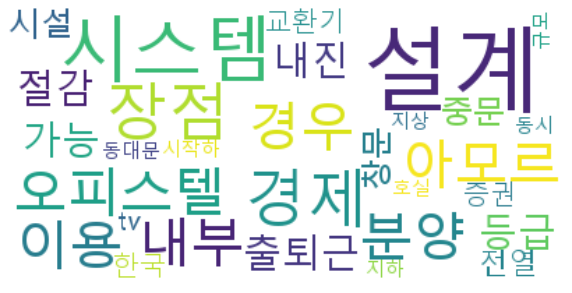

In [14]:
def makeWordCloud(argStr, argNumWord, argLstPosStopWC):
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
    
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")
    
    lstNormSent = makeLstNormSent(lstPosSent,              # 입력
                                  argLstPosStopWC,         # 제거 품사 리스트
                                  argPos=False,            # 품사정보는 출력하지 않음
                                  argMinLen=2,             # 최소 단어 길이
                                  argOne=True)             # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                   background_color='white',
                   max_words=argNumWord)
    wc.generate(lstNormSent[0])

    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")                                    
    plt.show()

    #수정
# 형태소 분석하여 불용 품사 및 2음절 이하 단어 제거하고
# 나머지 형태소들로 1개의 문자열을 만듬(단어 수 정의)
lstPosStopWC = ["VX", "VC", "MD", "MA", "IC", "JK", "JX", "JC", "E", "X", "S", "U"]
makeWordCloud(lstTextNews[0], 30, lstPosStopWC)

## RNN Generator

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import re

In [16]:
def makeCorpus(argLstSent):
    lstCorpus = []
    for aSent in argLstSent:
        aSent = aSent.split()
        lstCorpus.append(aSent)
    return lstCorpus

corpusRaw = makeCorpus(lstNormSent)
print(f"{len(corpusRaw)}\n{corpusRaw}")

9
[['동대문', '더', '아모르', '오피스텔', '이', '분양', '을', '시작하', '었', '다', '.'], ['140', '호실', '로', '지하', '1', '층', '지상', '14', '층', '규모', '로', '설계', '되', '었', '으며', '동시', '주차', '대수', '는', '약', '70', '대', '이', '다', '.'], ['주변', '교통망', '의', '경우', '내부', '순환', '로', '강변', '북로', '동부', '간선', '도로', '와', '인접', '하', 'ㄴ', '서울', '전역', '으로', '의', '이동', '이', '용이', '하', '고', '5', '호', '선', '장', '하', 'ㄴ', '평', '역과', '7', '호', '선', '용마', '산역', '과', '근접', '하', '어', '있', '다', '.'], ['특히', '2', '개', '이상', '의', '노선', '을', '모두', '이용', '하', 'ㄹ', '수', '있', '는', '멀티', '역세권', '으로써', '출퇴근', '소요', '시간', '이', '단축', '되', 'ㄹ', '수', '있', '다', '.'], ['뿐', '만', '아니', '라', '차량', '을', '이용', '하', '어', '직장', '이', '밀집', '하', '어', '있', '는', '종로', '나', '아', '강남', '으로', '출퇴근', '하', 'ㄹ', '경우', '10', '분대', '로', '진입', '이', '가능', '하', '다', '.', '이'], ['밖', '에', '도', '설계', '적', '이', 'ㄴ', '면', '에서', '의', '장점', '으로', '는', '내진', '설계', '강진', '에', '도', '견디', 'ㄹ', '수', '있', '는', '우수', '하', 'ㄴ', '내진', '7', '등급', '설계', '저녹스', '보일러', '각', '세대', '별', 

In [17]:
def getLenMaxSent(argLstStr):
    lenMax = 0
    for aStr in argLstStr:
        lenSent = len(aStr.split())
        if lenMax < lenSent: 
            lenMax = lenSent
    return lenMax

lenMaxSent = getLenMaxSent(lstNormSent)
print(lenMaxSent)

84


In [18]:
# Corpus로 만든 사전 크기 확인.
tokenizerMy = Tokenizer()
tokenizerMy.fit_on_texts(corpusRaw)
sizeVocab = len(tokenizerMy.word_index)
print(f"sizeVocab : {sizeVocab}")

# padding포함한 단어로 tokenize
tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
tokenizerMy.fit_on_texts(corpusRaw)
    
# Encoded corpus 만들기
corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
# print(corpusEncoded)

sizeVocab : 222


In [19]:
def makeTrainData(argCorpusEncoded, argLenMaxSent):
        # 학습용 문장 데이터를 만든다.
    trainDataEncoded = []
    for aSentEncoded in argCorpusEncoded:
        for ith in range(2, len(aSentEncoded)+1):
            aSequence = aSentEncoded[:ith]
            trainDataEncoded.append(aSequence)
            
    trainDataEncodedPad = pad_sequences(trainDataEncoded,
                                        maxlen=argLenMaxSent,
                                        padding='pre')
    # X와 Y로 쪼갠다.
    XTrain    = trainDataEncodedPad[:,:-1]      # 끝에서 두번째 컬럼까지.
    YTrainRaw = trainDataEncodedPad[:, -1]      # 마지막 컬럼.
    
    return XTrain, YTrainRaw

XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
print(XTrain)

# YTrain을 one-hot encoding 해둔다.
YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)
print(YTrain)


[[  0   0   0 ...   0   0  59]
 [  0   0   0 ...   0  59  26]
 [  0   0   0 ...  59  26  27]
 ...
 [  0   0   0 ... 219 220  54]
 [  0   0   0 ... 220  54  58]
 [  0   0   0 ...  54  58 221]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
def makeRnnModel(argXTrain, argYTrain, argNumWords, argEpochs):
    # Model 생성
    numWords = argNumWords + 1
    numEmb = 10                                  # Embedding 차원수.
    numHidden = 128                              # 메모리셀의 노드수.
    modelRNN = Sequential()
    modelRNN.add(Embedding(numWords, numEmb))
    modelRNN.add(SimpleRNN(units=numHidden,
                           return_sequences=False))# Sequence To Vector.
    modelRNN.add(Dense(units=numWords, activation='softmax'))

    # Optimizer 객체 생성 후 컴파일한다.
    rateLearn = 0.001   # Hyper Parameter 설정
    optMy = Adam(lr=rateLearn)
    modelRNN.compile(loss='categorical_crossentropy',
                     optimizer=optMy,
                     metrics=['accuracy'])
    
    # 학습.
    eStopMy = EarlyStopping(monitor='loss',
                            mode='min',
                            patience=5,
                            verbose=1)          # 조기 종료 허락!
    
    smryMy = modelRNN.fit(argXTrain,
                          argYTrain,
                          epochs=argEpochs,
                          verbose=0,
                          callbacks=[eStopMy])
        
    return modelRNN

modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=30)    

In [29]:
# 확률적으로 다음 단어를 예측해 주는 헬퍼 함수.
def stochasticPrediction(argPreds, argTemperature=1.0):
    predsMy = np.array(argPreds).astype('float64')
    # "온도"가 낮을수록 확정적, 높을수록 확률적이 된다.
    predsMy = np.log(predsMy)/ argTemperature
    predsExp = np.exp(predsMy)
    predsMy = predsExp/np.sum(predsExp)
    # 1회 1개의 랜덤 표본만 추출한다.
    probabilities = np.random.multinomial(n=1, pvals=predsMy, size=1)
    return np.argmax(probabilities)

# 예측을 위한 헬퍼 함수 버전
def makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumWord, argReset=True, temperature=1.0): 
    print(argToken.word_index)
    cnt=0
    strIn = argLstSeed.pop(0)[0]
    strOut = strIn
    
    while cnt < argNumWord:        
        # 완성되가는 문장의 인터저 인코딩.
#         print(strIn)
#         encoded = argToken.texts_to_sequences([strIn])[0]
        encoded = []
        for x in strIn.split():
            encoded.append(argToken.word_index[x])
#         print(encoded)
        
        # Padding을 적용해서 X_test를 만든다.
        XTest = pad_sequences([encoded], maxlen=argLenMaxSent-1, padding='pre')
#         print(XTest)
        
        # softmax를 통해서 출력된 예측은 일종의 "multinomial" 확률이다.
        my_preds = argModel.predict(XTest)
        
        # 다음 단어의 인덱스를 예측한다.
        idx = stochasticPrediction(my_preds[0], temperature)
#         print(f"idx : {idx}")
        
        # 예측된 인덱스를 실제 단어로 변환.
        wordPred = argToken.index_word[idx]
#         print(wordPred)

        strOut += " " + wordPred
        
        
        #수정 필요
        if argReset:
            if wordPred in [".",  "?", "!", ".-sf", "?-sf", "!-sf"]:
                strIn   = argLstSeed.pop(0)[0]
                strOut += " " + strIn
            else:
                strIn += " "  + wordPred
        else:
            strIn += " " + wordPred
            if wordPred in [".",  "?", "!", ".-sf", "?-sf", "!-sf"]:
                strSeed = argLstSeed.pop(0)[0]
                strIn  += " " + strSeed
                strOut += " " + strSeed
            
        cnt += 1
        
    return strOut


lstSeed01 = lstSeed[:]
#lstSeed01 = [('법사 위원장', ['문제']), ('상임 위원장', ['모두', '문제', '배분', '자리', '재배']), ('위원장 문제', ['관련', '마무리', '언급', '특히']), ('인사 청문회', ['뇌관', '물론', '부터', '진행']), ('권한 대행', ['원내', '이날', '특히']), ('대표 대행', ['반도체', '호중', '후보자']), ('서울 경제', ['기현', '무단', '폴리']), ('위원장 자리', ['배분', '야당', '요구']), ('공장 방문', ['ㄴ다는', '예정']), ('국회 에서', ['가지', '기자']), ('논의 난항', ['기현', '으로']), ('다음 절차', ['진행', '진행하']), ('대표 16', ['법사', '서울']), ('민주당 의원', ['위원장', '총회']), ('부동 산세', ['법안', '완화']), ('손실 보상법', ['부동', '입법']), ('원내 대표', ['16', '지나']) ]
makeSentRnn(modelRNN,
            tokenizerMy,
            lstSeed01,
            lenMaxSent,
            100,
            argReset=False,
            temperature=0.5)

{'이': 1, '하': 2, 'ㄴ': 3, '다': 4, '.': 5, '는': 6, '과': 7, '있': 8, '설계': 9, '의': 10, '로': 11, '으로': 12, 'ㄹ': 13, '등': 14, '어': 15, '시스템': 16, '을': 17, '었': 18, '1': 19, '되': 20, '2': 21, '수': 22, '에서': 23, '장점': 24, '경제': 25, '더': 26, '아모르': 27, '오피스텔': 28, '분양': 29, '층': 30, '경우': 31, '내부': 32, '용이': 33, '고': 34, '호': 35, '선': 36, '7': 37, '이용': 38, '출퇴근': 39, '만': 40, '가능': 41, '에': 42, '도': 43, '적': 44, '내진': 45, '등급': 46, '절감': 47, '중문': 48, '창문': 49, '를': 50, '시설': 51, '전열': 52, '교환기': 53, '및': 54, '증권': 55, '한국': 56, 'tv': 57, '재': 58, '동대문': 59, '시작하': 60, '140': 61, '호실': 62, '지하': 63, '지상': 64, '14': 65, '규모': 66, '으며': 67, '동시': 68, '주차': 69, '대수': 70, '약': 71, '70': 72, '대': 73, '주변': 74, '교통망': 75, '순환': 76, '강변': 77, '북로': 78, '동부': 79, '간선': 80, '도로': 81, '와': 82, '인접': 83, '서울': 84, '전역': 85, '이동': 86, '5': 87, '장': 88, '평': 89, '역과': 90, '용마': 91, '산역': 92, '근접': 93, '특히': 94, '개': 95, '이상': 96, '노선': 97, '모두': 98, '멀티': 99, '역세권': 100, '으로써': 101, '소요': 102, '시간': 103, '

'경제 tv 더 는 2 는 ㄴ 으로 의 별 이 있 하 ㄹ 하 이 선 는 등 으로써 있 시스템 성능 테크 이 우수 하 ㄴ 평 70 등 하 아 정화 내진 등 탁 하 ㄴ 공간 중문 장점 ㄴ 부 다 . 장점 으로 ㄴ 다 . 10 분대 tv 다 . 14 규모 있 다 . 140 호실 내진 이중창 수 하 ㄴ 커뮤니케이션 ㄹ 는 있 다 지하 으며 복합 역과 이 시작하 이 로 하 ㄴ 수 설계 는 이 만 이 ㄹ 과 이 있 다 . live 보기 이 이 . no 테크 하 ㄴ 5 내진 등 시설 과 제거 있 는 공간 먼지'

#### 1. RNN With Normal/Ending

In [22]:
def addClosingToSent(argLstSent):
    lstSentAddClosing = []
    endingPre = ". "
    for aSent in argLstSent:
        aSent = endingPre + aSent
        lstSentAddClosing.append(aSent)
        
        ending = aSent.split()[-1][-1]
        if ending in [".", "!", "?"]:
            endingPre = ending + " "
    return lstSentAddClosing

lstSentAddClosing = addClosingToSent(lstSent)
print(f"{len(lstSentAddClosing)}\n{lstSentAddClosing}")


9
['. 동대문 더 아모르 오피스텔이 분양을 시작했다.', '. 140 호실로 지하 1 층 지상 14 층 규모로 설계됐으며 동시 주차 대수는 약 70대다.', '. 주변 교통망의 경우 내부 순환로 강변 북로 동부 간선도로와 인접한 서울 전역으로의 이동이 용이하고 5호 선 장한 평 역과 7호 선 용마 산역과 근접해 있다.', '. 특히 2개 이상의 노선을 모두 이용할 수 있는 멀티 역세권으로써 출퇴근 소요시간이 단축될 수 있다.', '. 뿐만 아니라 차량을 이용해 직장이 밀집해 있는 종로 나 강남으로 출퇴근 할 경우 10 분대로 진입이 가능하다.이', '. 밖에도 설계적인 면에서의 장점으로는 내진설계 강진에도 견딜 수 있는 우수한 내진 7 등급설계 저녹스 보일러 각 세대별 설치로 개별 난방과 연료 절감 2 중 중문 거실과 방이 2 열 미닫이 중문으로 탁 트인 개방 감과 용이한 공간 활용 등이 있다.', '. 아울러 시스템적인 장점으로는 1 등급 창문 기밀 성능 외부에서 내부를 보호하는 로이 창문과 이중창으로 집안 온도 유지 용이 과 커뮤니티 시설과 범죄 예방 설계 입주민 커뮤니케이션 등 시설과 설계부터 적용된 시스템 에너지 절감형 환기장치 전열 교환기로 미세 먼지 등 유해물질 제거 및 공기 정화 시스템 풀 옵션 고급 가전 세탁기 빌트인 냉장고 시스템 에어컨 전열 교환기 등 이 있다.', '. 분양 관계자는 더 아모르는 편리한 생활환경 풍부한 생활 인프라 직장인과 대학가 복합 탄탄한 임대수요 도심 속 힐 링이 가능한 그린 라이프 이 오피스텔만의 매력적인 특화설계 등의 장점이 있다 고 말했다.', '. 디지털전략 부 네이버에서 경제 증권 전문방송의 한국경제 tv를 구독 하세요 대한민국 no.1 재 테크 증권정보 주식상담 부동산 live 보기 한국경제 tv 무단 전재 및 재배포 금지']


In [23]:
def genSentByRnn(argStr, argLstPosStop, argType="Norm", argReset=True, argNumWord=100, argEpochs=100):

#     print(argStr)
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
    
    if argType=="Ending":
        lstSent = addClosingToSent(lstSent)
        
#     print(f"{len(lstSent)}\n{lstSent}")
        
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,            # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=False,          # 품사정보는 출력하지 않음
                                  argMinLen=0,           # 최소 단어 길이
                                  argOne=False)           # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    lstNGram = makeNGram(lstNormSent, argNum=3)
#     print(f"{len(lstNGram)}\n{lstNGram}")    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")

    corpusRaw = makeCorpus(lstNormSent)
#     print(f"{len(corpusRaw)}\n{corpusRaw}")

    lenMaxSent = getLenMaxSent(lstNormSent)
    print(f"lenMaxSent : {lenMaxSent}")

    tokenizerMy = Tokenizer()
    tokenizerMy.fit_on_texts(corpusRaw)
    sizeVocab = len(tokenizerMy.word_index)
    print(f"sizeVocab : {sizeVocab}")

    tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
    tokenizerMy.fit_on_texts(corpusRaw)
#     print(tokenizerMy.word_index)
    
    corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
#     print(corpusEncoded)

    XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
    YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)

    modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=argEpochs)

#     lstSeed = [('법사 위원장', ['문제']), ('상임 위원장', ['모두', '문제', '배분', '자리', '재배']), ('위원장 문제', ['관련', '마무리', '언급', '특히']), ('인사 청문회', ['뇌관', '물론', '부터', '진행']), ('권한 대행', ['원내', '이날', '특히']), ('대표 대행', ['반도체', '호중', '후보자']), ('서울 경제', ['기현', '무단', '폴리']), ('위원장 자리', ['배분', '야당', '요구']), ('공장 방문', ['ㄴ다는', '예정']), ('국회 에서', ['가지', '기자']), ('논의 난항', ['기현', '으로']), ('다음 절차', ['진행', '진행하']), ('대표 16', ['법사', '서울']), ('민주당 의원', ['위원장', '총회']), ('부동 산세', ['법안', '완화']), ('손실 보상법', ['부동', '입법']), ('원내 대표', ['16', '지나']) ]

#   makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumWord, argReset=True, temperature=1.0): 
    strRes = makeSentRnn(modelRNN,
                         tokenizerMy,
                         lstSeed,
                         lenMaxSent,
                         argNumWord,
                         argReset,
                         temperature=0.1)
    return strRes

lstPosStop=[]
genSentByRnn(lstTextNews[0], lstPosStop, argType="Norm", argReset=False, argNumWord=50, argEpochs=50)
# genSentByRnn(argStr, argLstPosStop, argType="Norm", argReset=False, argNumWord=100, argEpochs=100):


lenMaxSent : 84
sizeVocab : 222


'경제 tv 아모르 는 적 하 ㄴ 생활환경 으로 7 ㄴ 시스템 용마 하 과 근접 이 가능 하 다 . 장점 으로 하 어 직장 이 적 하 ㄴ 있 는 종로 나 아 강남 성능 출퇴근 하 ㄹ 경우 10 분대 로 진입 이 가능 하 다 . 10 분대 로 등 의 이'

#### 2. RNN with POS

In [24]:
def makeNGramWithPos(argLstSent, argNum=3):
    vectMy = CountVectorizer(ngram_range=(argNum, argNum),
                             token_pattern=r"(?u)\b\w\w+-\w+\b",
                             analyzer="word")
    lstNGram = vectMy.fit(argLstSent).get_feature_names()
    # ar2NGramCnt = vectMy.transform(argLstSent).toarray()  # 결과는 array of array.
    # lstNGramCnt = list(ar2NGramCnt[0])                    # 단순한 리스트로 변환.
    return(lstNGram)

In [25]:
strSent = "코로나-nng 19-nr 확산-nng 세가-nng 지속-nng 하-xsv 면서-ece 전국-nng \
곳곳-nng 에서-jkm 확-mag 진자-nng 가-jks 잇따르-vv 고-ece 있-vxv 다-efn .-sf 이-jks \
지나-vv ㄴ-etd 명-nnm 이-jks 코로나-nng 19-nr 확-mag 진-nng 판정-nng 을-jko 받-vv \
았-ept 다-efn .-sf 이-jks 지나-vv 1-nr 명-nnm 이-jks 확-mag 진-nng 되-xsv 었-ept \
다-efn .-sf 이-jks 확-mag 진자-nng 가-jks 발생-nng 하-xsv ㄴ-etd 건물-nng 전체-nng \
를-jko 소독-nng 하-xsv 었-ept 고-ece 해당-nng 건물-nng 에서-jkm 근무-nng 하-xsv \
는-etd 직원-nng 전원-nng 을-jko 대상-nng 으로-jkm 진단-nng 검사-nng 를-jko \
진행하-vv 었-ept 다-efn .-sf 이-jks 확-mag 진-nng 되-xsv 었-ept 다-efn .-sf \
이-jks 대학생-nng 1-nr 명-nnm 등-nnb 되-xsv 었-ept 명-nnm 이-jks 확-mag 진자-nng \
되-xsv 었-ept 다-efn .-sf 확-mag 진자-nng 1-nr 명-nnm"

def constNormSent(argStr):
    lstRet = []
    for elm in argStr.split(" "):
        lstRet.append(elm.split("-")[0])
    return " ".join(lstRet)

print(constNormSent(strSent))    

코로나 19 확산 세가 지속 하 면서 전국 곳곳 에서 확 진자 가 잇따르 고 있 다 . 이 지나 ㄴ 명 이 코로나 19 확 진 판정 을 받 았 다 . 이 지나 1 명 이 확 진 되 었 다 . 이 확 진자 가 발생 하 ㄴ 건물 전체 를 소독 하 었 고 해당 건물 에서 근무 하 는 직원 전원 을 대상 으로 진단 검사 를 진행하 었 다 . 이 확 진 되 었 다 . 이 대학생 1 명 등 되 었 명 이 확 진자 되 었 다 . 확 진자 1 명


In [ ]:
def enhancedSeed(argLstSeed):
    lstResult = []
    for elm in argLstSeed:
        strSeed = elm[0]
        lstTmp = strSeed.split()
        if(    re.search("^nn", lstTmp[0].split('-')[1])
            and re.search("^nn", lstTmp[1].split('-')[1]) ):
            lstResult.append(elm)
    return lstResult

def strOut(argStr, argStrSubj):
    lenSubj = len(argStrSubj)
    print(f"\n========== {argStrSubj} ", end="")
    print("="*(80-12-lenSubj))
    print(argStr)


def genSentByRnnWithPos(argStr, argLstPosStop, argReset=True, argEnhanceSeed=True, argNumWord=100, argEpochs=100):

    print(argStr)
    kkma = konlpy.tag.Kkma()
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
        
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(kkma.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,            # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=True,          # 품사정보는 출력하지 않음
                                  argMinLen=0,           # 최소 단어 길이
                                  argOne=False)           # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    lstNGram = makeNGramWithPos(lstNormSent)
#     print(f"{len(lstNGram)}\n{lstNGram}")    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")
    
    if argEnhanceSeed:
        lstSeed = enhancedSeed(lstSeed)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")
    

    corpusRaw = makeCorpus(lstNormSent)
    lenMaxSent = getLenMaxSent(lstNormSent)
    print(f"lenMaxSent : {lenMaxSent}")
    
    tokenizerMy = Tokenizer()
    tokenizerMy.fit_on_texts(corpusRaw)
    sizeVocab = len(tokenizerMy.word_index)
    print(f"sizeVocab : {sizeVocab}")

    tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
    tokenizerMy.fit_on_texts(corpusRaw)
#     print(tokenizerMy.word_index)
    
    corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
#     print(corpusEncoded)

    XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
    YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)
#     print(XTrain[:10])

    modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=argEpochs)
    
#   makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumWord, argReset=True, temperature=1.0): 
    strRes = makeSentRnn(modelRNN,
                         tokenizerMy,
                         lstSeed,
                         lenMaxSent,
                         argNumWord,
                         argReset,
                         temperature=0.1)
    strRes = constNormSent(strRes)
    
    return strRes

lstPosStop=[]
strResult = genSentByRnnWithPos(lstTextNews[0], lstPosStop, argReset=True, argNumWord=50, argEpochs=50)
# genSentByRnnWithPos(argStr, argLstPosStop, argReset=True, argNumWord=100, argEpochs=100):

strResult

#### 3. Testing


========== Original Sentence ===================================================
 kbs 강릉 삼척 오십천 둔치에 조성된 장미공원이 오늘 21일 부터 7월 18일까지 야간 개장합니다.개장 기간 동안 빛의 정원 천만송이 장미가 품은 6개의 빛 을 주제로 사랑과 축복 희망 등 6개 구획 별로 테마 조명과 포토존이 운영되며 개장 한 달 동안은 현장에 dj 부스를 설치해 음악과 사연을 방송합니다.삼척시는 코로나19 확산 방지를 위해 출입구에서 발열 여부를 검사하는 등 방역 관리에 힘쓸 방침입니다.조연주 yeonjoo kbs.co.kr 더 빠르고 정확한 소식을 원하시면 kbs뉴스 구독! 코로나19 언제 어떤 백신을 누가 맞을까? 제보는 kbs! 여러분이 뉴스를 만들어 갑니다


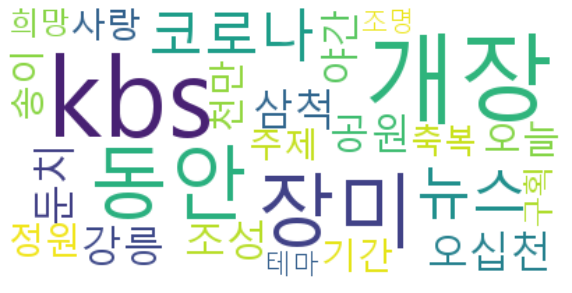


========== Trigram =============================================================
 코로나 19 언제 어떻 백신 을까 18 까지 야간 개장 ㅂ니다 19 언제 어떻 백신 을까 19 확산 방지 위하 출입구 에서 발열 여부 검사 방역 관리 힘쓰 방침 ㅂ니다 21 부터 18 까지 야간 개장 ㅂ니다 co kr 빠르 정확 소식 원하 kbs 뉴스 구독 코로나 19 언제 어떻 백신 을까 dj 부스 설치 음악 사연 방송 ㅂ니다 kbs co kr 빠르 정확 소식 원하 kbs 뉴스 구독 코로나 19 확산 방지 위하 출입구 에서 발열 여부 검사 방역 관리 힘쓰 방침 ㅂ니다 kbs 강릉 삼척 오십천 둔치 조성 장미 공원 오늘 21 부터 18 까지 야간 개장 ㅂ니다 kbs 뉴스 구독 코로나 19 언제 어떻 백신 을까 kbs 여러분 뉴스 만들 ㅂ니다 kr 빠르 정확 소식 원하 kbs 뉴스 구독 코로나 19 언제
lenMaxSent : 58
sizeVocab : 108
{'하': 1, '.': 2, 'kbs': 3, '이': 4, 'ㅂ니다': 5, '을': 6, '를': 7, '에': 8, 'ㄴ': 9, '개장': 10, '과': 11, '어': 12, '는': 13, '되': 14, '장미': 15, '일': 16, '동안': 17, '빛': 18, '의': 19, '가': 20, '은': 21, '6': 22, '개': 23, '등': 24, '코로나': 25, '19': 26, '뉴스': 27, '!': 28, '강릉': 29, '삼척': 30, '오십천': 31, '둔치': 32, '조성': 33, '공원': 34, '오늘': 35, '21': 36, '부터': 37, '7': 38, '월': 39, '18': 40, '까지': 41, '야간': 42, '기간': 43, '정원': 44, '천만': 45, '송이': 46, '품': 47, '주제': 48, '로': 49, '사랑': 50, '축복': 51, '희망':


========== RNN + POS + EnhanceSeed =============================================
강릉 삼척 는 는 kbs ! 개장 기간 뉴스 를 만들 어 갈 ㅂ니다 소식 오늘 관리 에 힘쓰 7 월 18 하 까지 야간 개장 하 ㅂ니다 . 개장 동안 이 구획 별로 테마 ㅂ니다 . 검사 방역 이 ㄹ 되 며 ㄴ 하 달 소식 가 부스 에 dj 부스 를 설치 하 코로나 19 장미 사연 ㅂ니다 방송 21 ㅂ니다 . 공원 오늘 며 개장 하 은 개장 . 구독 코로나 를 부스 에 dj ㅂ니다 은 설치 ㅂ니다 . 기간 동안 설치 ㅂ니다 방송 등 ㄴ 백신 을 누 은 조명 kbs ? 뉴스 구독 검사 에 은 ㅂ니다 . 동안 정원 . 동안 현장 어 과 과 설치 등 은 음악 일 부터 부스 방송
lenMaxSent : 58
sizeVocab : 113
Epoch 00099: early stopping
{'하-xsv': 1, '.-sf': 2, 'kbs-ol': 3, 'ㅂ니다-efn': 4, '를-jko': 5, '에-jkm': 6, 'ㄴ-etd': 7, '이-jks': 8, '개장-nng': 9, '을-jko': 10, '되-xsv': 11, '장미-nng': 12, '일-nnm': 13, '동안-nng': 14, '빛-nng': 15, '의-jkg': 16, '가-jks': 17, '은-jx': 18, '6-nr': 19, '개-nnm': 20, '등-nnb': 21, '과-jc': 22, '어-ecs': 23, '는-jx': 24, '코로나-nng': 25, '19-nr': 26, '뉴스-nng': 27, '!-sf': 28, '강릉-nnp': 29, '삼척-nng': 30, '오십천-nnp': 31, '둔치-nng': 32, '조성-nng': 33, '공원-nng': 34, '오늘-nng': 35, '21-nr': 36, '부터-jx': 37, '7-nr': 38, '월-nnm': 39, '18-nr': 40, '까지-jx': 41, 

IndexError: pop from empty list

In [30]:
def strOut(argStr, argStrSubj):
    lenSubj = len(argStrSubj)
    print(f"\n========== {argStrSubj} ", end="")
    print("="*(80-12-lenSubj))
    print(argStr)
    
    
numNews = 1
numWordCloud = 25
numWord = 100
numEpochs=100
lstPosStop=[]
lstPosStopWC = ["VX", "VC", "MD", "MA", "IC", "JK", "JX", "JC", "E", "X", "S", "U"]

def summary():
    naverNewsUrl = "https://news.naver.com"
    lstSumNews = []
    strTmp = ""
    
    lstTextNews = getLstTextNews(naverNewsUrl, numNews)
    for aNews in lstTextNews:
        
        strOut(aNews, "Original Sentence")
        
        makeWordCloud(aNews, numWordCloud, lstPosStopWC)
        
        # Trigram을 이용하여 50단어로 요약(제거 품사는 없음)
        strTmp = genSentByNGram(aNews, numWord, lstPosStop)
        strOut(strTmp, "Trigram")
        
        # genSentByRnn(argStr, argLstPosStop, argType="Norm", argReset=False, argNumWord=100, argEpochs=100):
        strTmp = genSentByRnn(aNews, lstPosStop, argType="Norm",   argReset=False, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN")

        strTmp = genSentByRnn(aNews, lstPosStop, argType="Ending", argReset=True,  argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + Reset")

        strTmp = genSentByRnn(aNews, lstPosStop, argType="Ending", argReset=True,  argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + Reset + Ending")

        
        # genSentByRnnWithPos(argStr, argLstPosStop, argReset=True, argEnhanceSeed=True, argNumWord=100, argEpochs=100):
        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argReset=False, argEnhanceSeed=False, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + POS")

        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argReset=False, argEnhanceSeed=True, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + POS + EnhanceSeed")
        
        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argReset=True,  argEnhanceSeed=True, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + POS + EnhanceSeed + Reset")

summary()

## 향후
- 형태소 분석기 교체
    - 사용자 사전 사용 가능한...
- Seed 선택 방법
- 문장 단위로 재생성
- 문장 생성시 품사 고려
- 

In [28]:
from ckonlpy.tag import Twitter        # Okt는 작동하지 않음!
my_twitter=Twitter()   

twitPosSent = []
for x in lstSent:
    twitPosSent.append(my_twitter.pos(x))
print(f"{len(twitPosSent)}\n{twitPosSent}")

C:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


9
[[('동대문', 'Noun'), ('더', 'Noun'), ('아모', 'Noun'), ('르', 'Noun'), ('오피스텔', 'Noun'), ('이', 'Josa'), ('분양', 'Noun'), ('을', 'Josa'), ('시작', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation')], [('140', 'Number'), ('호실', 'Noun'), ('로', 'Josa'), ('지하', 'Noun'), ('1', 'Number'), ('층', 'Noun'), ('지상', 'Noun'), ('14', 'Number'), ('층', 'Noun'), ('규모', 'Noun'), ('로', 'Josa'), ('설계', 'Noun'), ('됐으며', 'Verb'), ('동시', 'Noun'), ('주차', 'Noun'), ('대수', 'Noun'), ('는', 'Josa'), ('약', 'Noun'), ('70', 'Number'), ('대다', 'Verb'), ('.', 'Punctuation')], [('주변', 'Noun'), ('교통', 'Noun'), ('망', 'Noun'), ('의', 'Josa'), ('경우', 'Noun'), ('내부', 'Noun'), ('순환로', 'Noun'), ('강변', 'Noun'), ('북로', 'Noun'), ('동부', 'Noun'), ('간선', 'Noun'), ('도로', 'Noun'), ('와', 'Josa'), ('인접', 'Noun'), ('한', 'Josa'), ('서울', 'Noun'), ('전역', 'Noun'), ('으로의', 'Josa'), ('이동', 'Noun'), ('이', 'Josa'), ('용이', 'Noun'), ('하고', 'Josa'), ('5', 'Number'), ('호', 'Noun'), ('선', 'Noun'), ('장한', 'Adjective'), ('평', 'Noun'), ('역', 'Noun'), ('과', 'Josa'), ('7'